In [1]:
import pandas as pd
import numpy as np

In [2]:
names=("Balance,Duration,History,Purpose,Credit amount,Savings,Employment,instPercent,sexMarried,Guarantors,Residence duration,Assets,Age,concCredit,Apartment,Credits,Occupation,Dependents,hasPhone,Foreign,lable").split(',')

data = pd.read_csv(r"E:/github/Machine-Learning/project/german credit/dataset/german.data",sep='\s+',names=names)

In [3]:
data.head()

,Balance,Duration,History,Purpose,Credit amount,Savings,Employment,instPercent,sexMarried,Guarantors,...,Assets,Age,concCredit,Apartment,Credits,Occupation,Dependents,hasPhone,Foreign,lable
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
data["Balance"].unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

In [5]:
len(data["Balance"].unique())

4

In [6]:
data.count()

Balance               1000
Duration              1000
History               1000
Purpose               1000
Credit amount         1000
Savings               1000
Employment            1000
instPercent           1000
sexMarried            1000
Guarantors            1000
Residence duration    1000
Assets                1000
Age                   1000
concCredit            1000
Apartment             1000
Credits               1000
Occupation            1000
Dependents            1000
hasPhone              1000
Foreign               1000
lable                 1000
dtype: int64

In [7]:
data.shape

(1000, 21)

In [8]:
#部分变量描述性统计分析
data.describe()

,Duration,Credit amount,instPercent,Residence duration,Age,Credits,Dependents,lable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [9]:
data["Duration"].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40],
      dtype=int64)

In [10]:
data["History"].unique()

array(['A34', 'A32', 'A33', 'A30', 'A31'], dtype=object)

In [11]:
data.groupby('Balance').size().sort_values(ascending=False)

Balance
A14    394
A11    274
A12    269
A13     63
dtype: int64

In [12]:
data.groupby("Purpose").size().sort_values(ascending=False)

Purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
dtype: int64

In [13]:
data.groupby("Apartment").size().sort_values(ascending=False)

Apartment
A152    713
A151    179
A153    108
dtype: int64

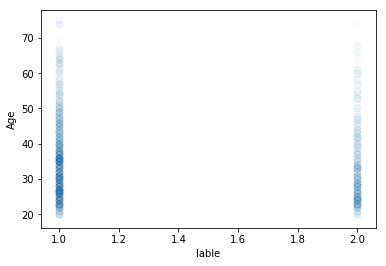

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot(x='lable', y='Age', kind='scatter',alpha=0.02, s=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010F3E5C0>]],
      dtype=object)

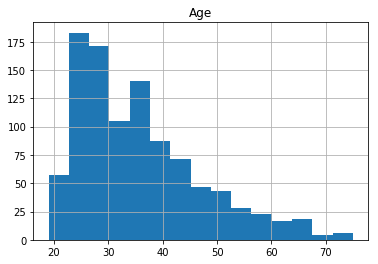

In [15]:
data.hist('Age',bins=15)

In [16]:
target = data.lable

In [17]:
features_data = data.drop("lable",axis=1)

In [18]:
numeric_features = [c for c in features_data if features_data[c].dtype.kind in ('i', 'f')] # 提取数值类型为整数或浮点数的变量
numeric_features

['Duration',
 'Credit amount',
 'instPercent',
 'Residence duration',
 'Age',
 'Credits',
 'Dependents']

In [19]:
numeric_data = features_data[numeric_features]

In [20]:
numeric_data.head()

,Duration,Credit amount,instPercent,Residence duration,Age,Credits,Dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2


In [21]:
categorical_data = features_data.drop(numeric_data,axis=1)

In [22]:
categorical_data.head()

,Balance,History,Purpose,Savings,Employment,sexMarried,Guarantors,Assets,concCredit,Apartment,Occupation,hasPhone,Foreign
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


In [23]:
categorical_data_encoded = categorical_data.apply(lambda x: pd.factorize(x)[0]) # pd.factorize即可将分类变量转换为数值表示
                                                                                # apply运算将转换函数应用到每一个变量维度
categorical_data_encoded.head(5)


,Balance,History,Purpose,Savings,Employment,sexMarried,Guarantors,Assets,concCredit,Apartment,Occupation,hasPhone,Foreign
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,1,0,0,0,0,0,1,0
2,2,0,1,1,2,0,0,0,0,0,1,1,0
3,0,1,2,1,2,0,1,1,0,1,0,1,0
4,0,2,3,1,1,0,0,2,0,1,0,1,0


In [24]:
features = pd.concat([numeric_data,categorical_data_encoded],axis=1)
features.head()

,Duration,Credit amount,instPercent,Residence duration,Age,Credits,Dependents,Balance,History,Purpose,Savings,Employment,sexMarried,Guarantors,Assets,concCredit,Apartment,Occupation,hasPhone,Foreign
0,6,1169,4,4,67,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48,5951,2,2,22,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0
2,12,2096,2,3,49,1,2,2,0,1,1,2,0,0,0,0,0,1,1,0
3,42,7882,2,4,45,1,2,0,1,2,1,2,0,1,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,2,3,1,1,0,0,2,0,1,0,1,0


In [25]:
# 此处也可以选用one-hot编码来表示分类变量，相应的程序如下：
# features = pd.get_dummies(features_data)
# features.head()

In [26]:
X = features.values.astype(np.float32) # 转换数据类型
y = (target.values == 1).astype(np.int32) # 1:good,2:bad

In [27]:
target.dtypes

dtype('int64')

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split # sklearn库中train_test_split函数可实现该划分

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 参数test_size设置训练集占比

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(max_depth=8) # 参数max_depth设置树最大深度

# 交叉验证，评价分类器性能，此处选择的评分标准是ROC曲线下的AUC值，对应AUC更大的分类器效果更好
scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc') 
print("ROC AUC Decision Tree: {:.4f} +/-{:.4f}".format(np.mean(scores), np.std(scores)))

ROC AUC Decision Tree: 0.6898 +/-0.0092


In [30]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, X, y, ylim=(0, 1.1), cv=3,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5),
                        scoring=None):
    
    plt.title("Learning curves for %s" % type(estimator).__name__)
    plt.ylim(*ylim); plt.grid()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, 
        X, 
        y, 
        cv=cv, 
        n_jobs=n_jobs, 
        train_sizes=train_sizes,
        scoring=scoring
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    plt.plot(
        train_sizes, 
        train_scores_mean, 
        'o-', 
        color="r",
        label="Training score"
    )
    
    plt.plot(
        train_sizes,
        validation_scores_mean,
        'o-',
        color="g",
        label="Cross-validation score"
    )
    
    plt.legend(loc="best")
    
    print("Best validation score: {:.4f}".format(validation_scores_mean[-1]))

Best validation score: 0.7327


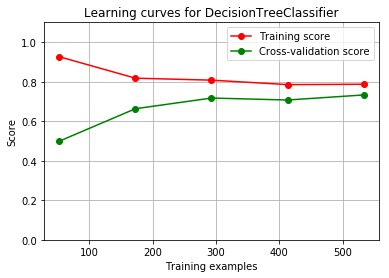

In [31]:
clf = DecisionTreeClassifier(max_depth=3)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')
# 可以注意到训练数据和交叉验证数据的得分有很大的差距，意味着可能过度拟合训练数据了

In [33]:
#利用validation_curve计算不同深度训练集和测试集交叉验证得分
from sklearn.model_selection import validation_curve


def plot_validation_curve(estimator, X, y, param_name, param_range,ylim=(0, 1.1), cv=3, n_jobs=1, scoring=None):
    estimator_name = type(estimator).__name__
    plt.title("Validation curves for %s on %s"% (param_name, estimator_name))
    plt.ylim(*ylim); plt.grid()
    plt.xlim(min(param_range), max(param_range))
    plt.xlabel(param_name)
    plt.ylabel("Score")

    train_scores, test_scores = validation_curve(
        estimator, 
        X, 
        y, 
        param_name, 
        param_range,
        cv=cv, 
        n_jobs=n_jobs, 
        scoring=scoring
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.semilogx(
        param_range, 
        train_scores_mean, 
        'o-', 
        color="r",
        label="Training score"
    )
    
    plt.semilogx(
        param_range, 
        test_scores_mean, 
        'o-', 
        color="g",
        label="Cross-validation score"
    )
    
    plt.legend(loc="best")
    print("Best test score: {:.4f}".format(test_scores_mean[-1]))


Best test score: 0.6423


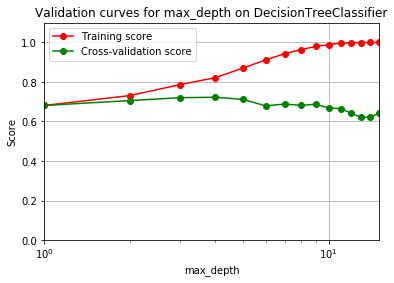

In [36]:
clf = DecisionTreeClassifier(max_depth=8)
param_name = 'max_depth'
param_range = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

plot_validation_curve(clf, X_train, y_train,param_name, param_range, scoring='roc_auc')

In [37]:
# 先利用随机森里来提升分类效果
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=27, max_features=15,max_depth=10) # 参数n_estimators设置森林中树的个数
                             

scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc',n_jobs=1)
print("ROC Random Forest: {:.4f} +/-{:.4f}".format(np.mean(scores), np.std(scores)))

ROC Random Forest: 0.7956 +/-0.0284


In [38]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
from sklearn.metrics import roc_auc_score
y_pred_proba = clf.predict_proba(X_test)[:, 1]
print("ROC AUC: %0.4f" % roc_auc_score(y_test, y_pred_proba))

ROC AUC: 0.7501


In [43]:
from sklearn.model_selection import GridSearchCV
# 使用gridsearch进行并行调参
parameters = {
    'n_estimators':[5,11,15,21,25,31], 
    'max_features':[5, 10,15,20],
    'max_depth':[3,6,9,12],
    'criterion':['gini','entropy']
}

clf = GridSearchCV(RandomForestClassifier(), parameters, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 11, 15, 21, 25, 31], 'max_features': [5, 10, 15, 20], 'max_depth': [3, 6, 9, 12], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)